# 1. Scheduling

In [7]:
from sampo.generator.base import SimpleSynthetic
from sampo.generator.environment.contractor_by_wg import get_contractor_by_wg, ContractorGenerationMethod
from sampo.generator.types import SyntheticGraphType
from sampo.pipeline import SchedulingPipeline
from sampo.scheduler.heft.base import HEFTScheduler

r_seed = 231
ss = SimpleSynthetic(r_seed)

simple_wg = ss.work_graph(mode=SyntheticGraphType.GENERAL,
                          cluster_counts=10,
                          bottom_border=100,
                          top_border=200)

contractors = [get_contractor_by_wg(simple_wg,
                                    method=ContractorGenerationMethod.AVG)]

scheduler = HEFTScheduler()

project = SchedulingPipeline.create() \
    .wg(simple_wg) \
    .contractors(contractors) \
    .schedule(scheduler) \
    .finish()

schedule = project.schedule

# 2. WorkGraph visualization

C:\Users\Иван\AppData\Local\Temp\ipykernel_18640\1518795928.py:5: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



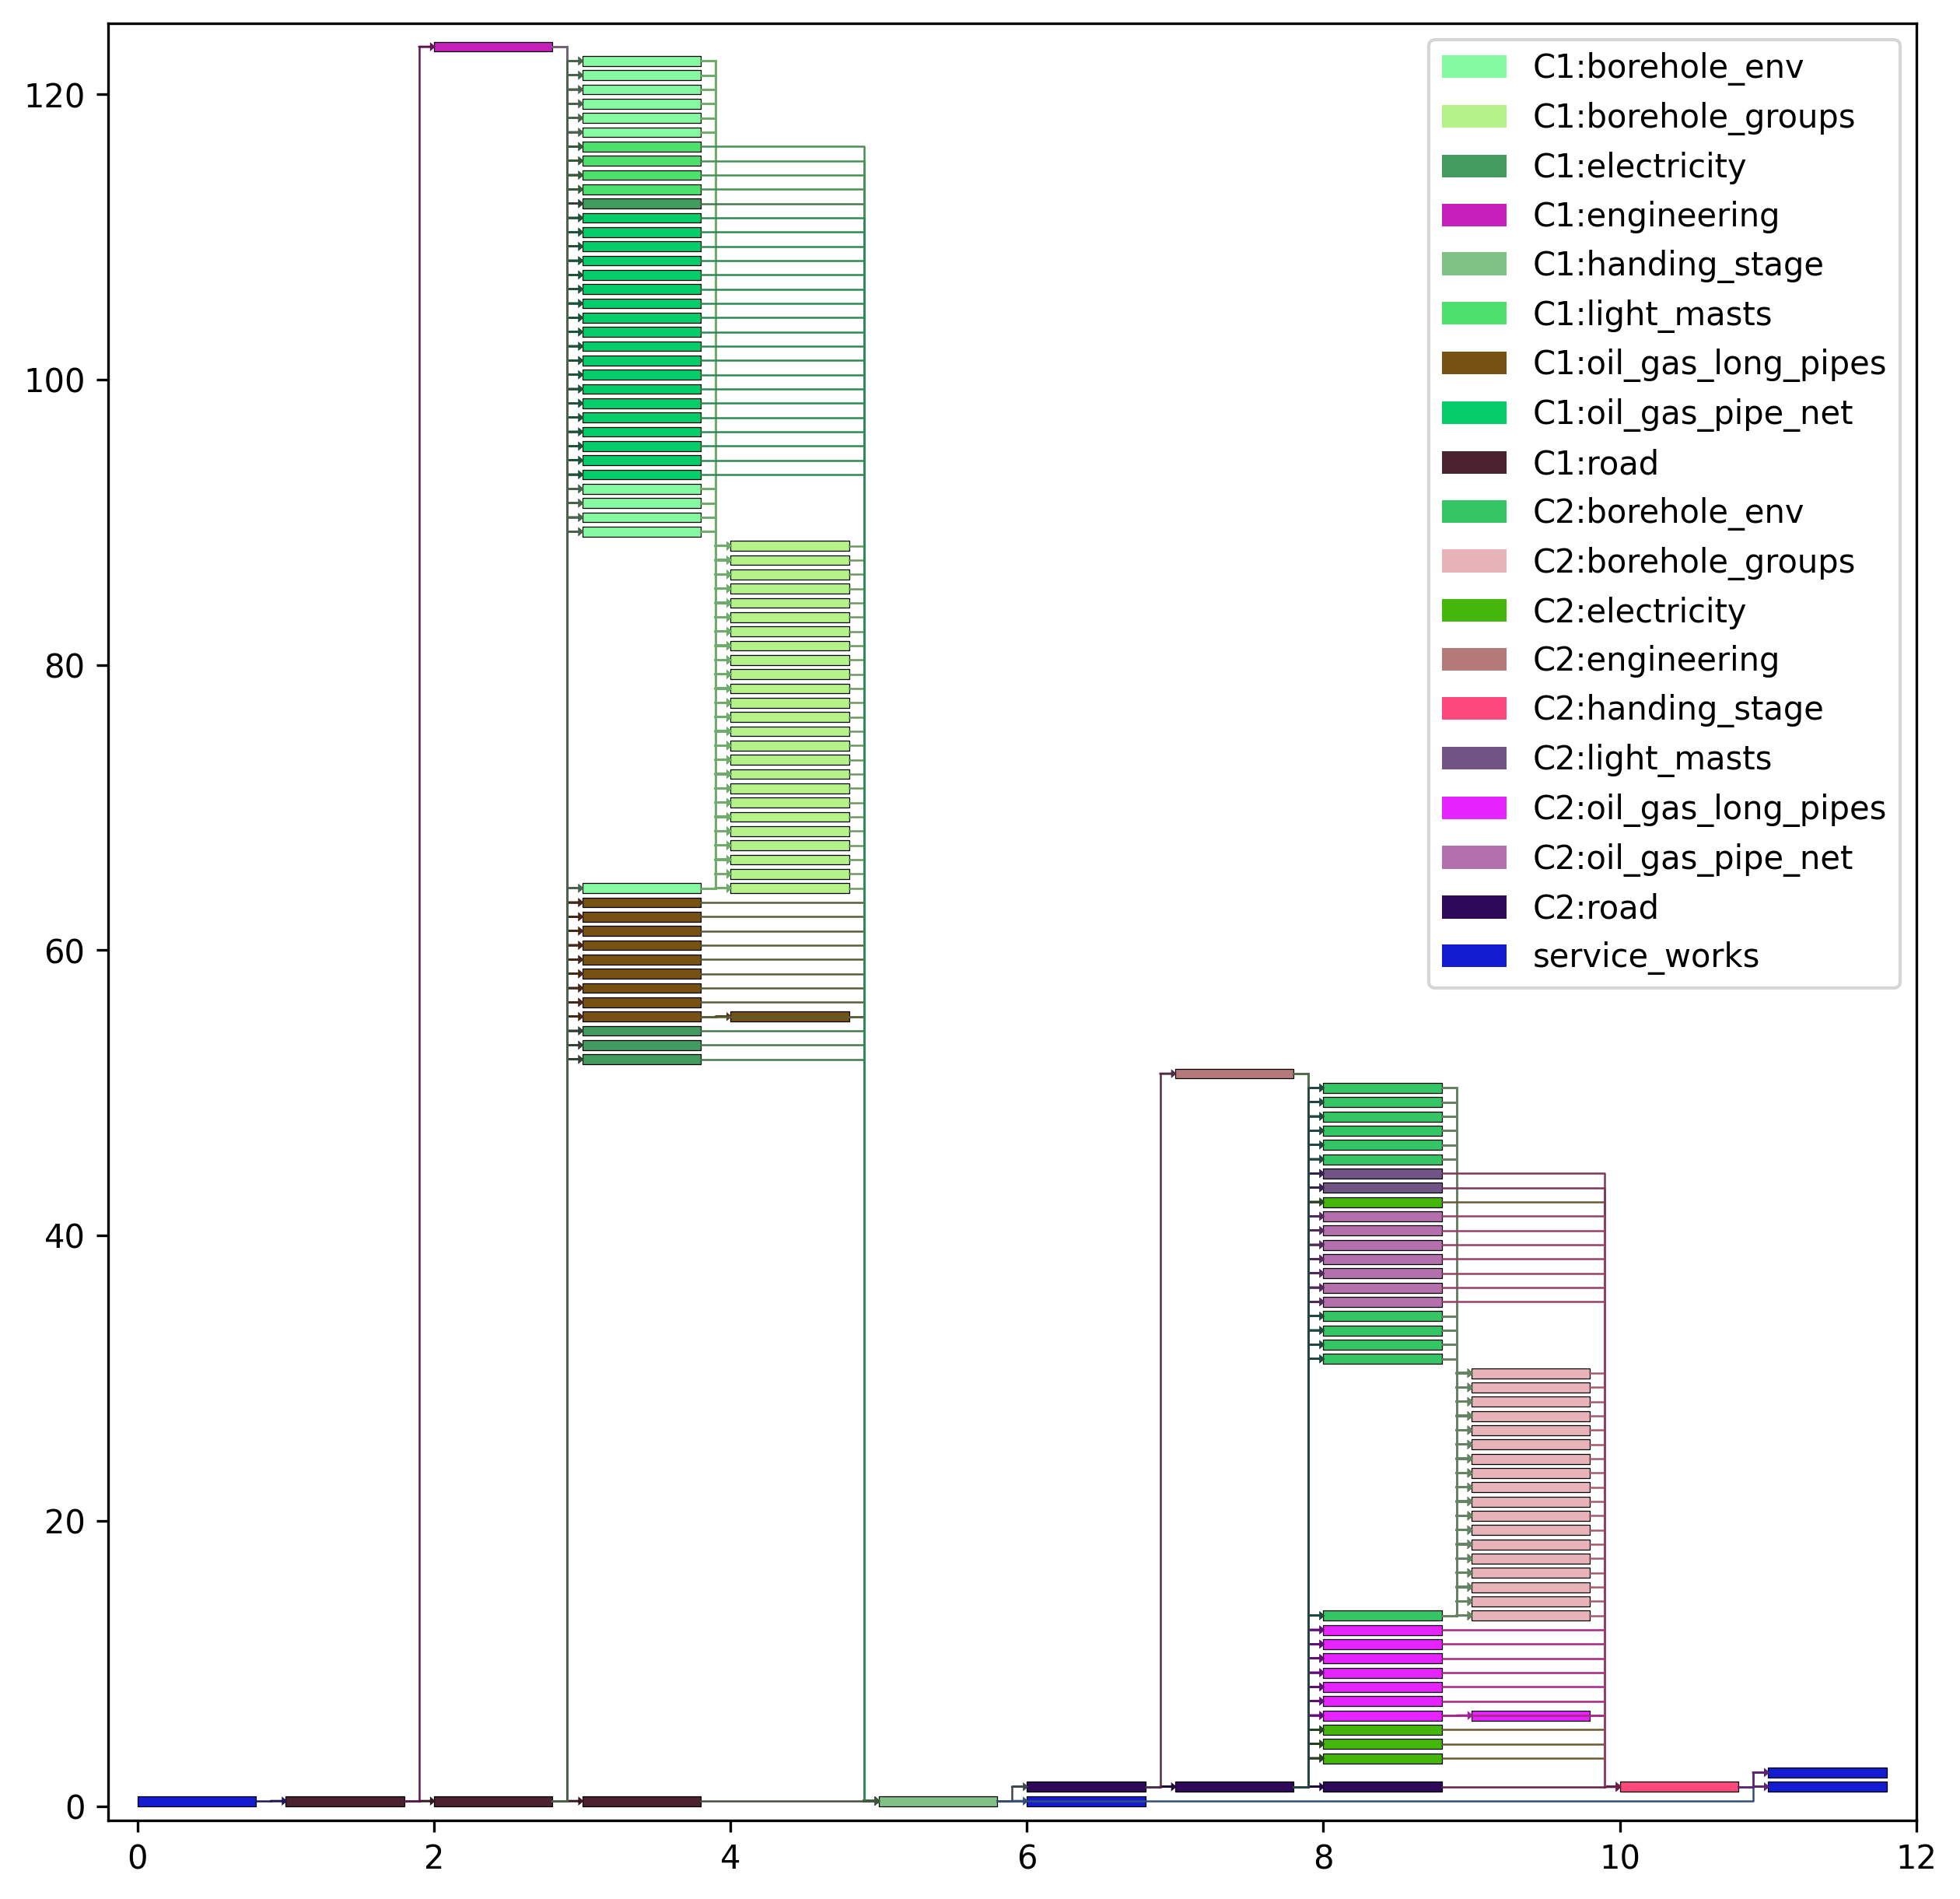

In [8]:
from sampo.utilities.visualization.work_graph import work_graph_fig

# here we build a figure that shows nodes and edges in beautiful style
fig = work_graph_fig(simple_wg, (10, 10))
fig.show()

# 3. Project Gant chart
There diagram that shows scheduled works on time scale

In [9]:
from sampo.utilities.visualization.base import VisualizationMode
from sampo.utilities.visualization.schedule import schedule_gant_chart_fig

# schedule was calculated in abstract 'time units', let's recalculate it with real dates
# also here we remove service nodes and edges
merged_schedule = schedule.merged_stages_datetime_df('2022-01-01')

# here we build an interactive HTML form with all info about scheduled works
fig = schedule_gant_chart_fig(schedule_dataframe=merged_schedule,
                              visualization=VisualizationMode.ShowFig,
                              remove_service_tasks=False)

# 4. Resource employment figs
There are a couple of figs that shows resource utilization.

### Resource employment by tasks

In [5]:
from sampo.utilities.visualization.resources import resource_employment_fig, EmploymentFigType

fig = resource_employment_fig(schedule=merged_schedule,
                              fig_type=EmploymentFigType.WorkLabeled,
                              vis_mode=VisualizationMode.ShowFig)

### Resource employment by dates

In [6]:
from sampo.utilities.visualization.resources import resource_employment_fig, EmploymentFigType

fig = resource_employment_fig(schedule=merged_schedule,
                              fig_type=EmploymentFigType.DateLabeled,
                              vis_mode=VisualizationMode.ShowFig)